# Antet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Load Data

In [2]:
df = pd.read_csv('anonim-clean.csv')

# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 
                         'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 
                         'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create a binary column for treatment type
df['treatment_type'] = np.where(df['tratament'].str.contains('chirurgical', case=False, na=False), 
                               'Chirurgical', 'Conservativ')

# Analiza descriptivă a cohortei de pacienți

In [3]:
# Vârstă
age_stats = df['vârstă'].describe()
# print("Age Statistics:")
# print(age_stats)

In [4]:
# Distribuția pe genuri
gender_counts = df['gen'].value_counts()
# print("\nDistribuția pe Gen:")
# print(gender_counts)

In [5]:
#  Pie chart pentru distribuția genurilor 
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuția Genurilor')
plt.axis('equal')
plt.savefig('gen-freq.png')
plt.show()

In [6]:
# Frecvențele modalităților imagistice
imaging_modalities = df['metodă imagistică'].str.split(', ', expand=True).stack().value_counts()
# print("\nImaging Modality Frequency:")
# print(imaging_modalities)

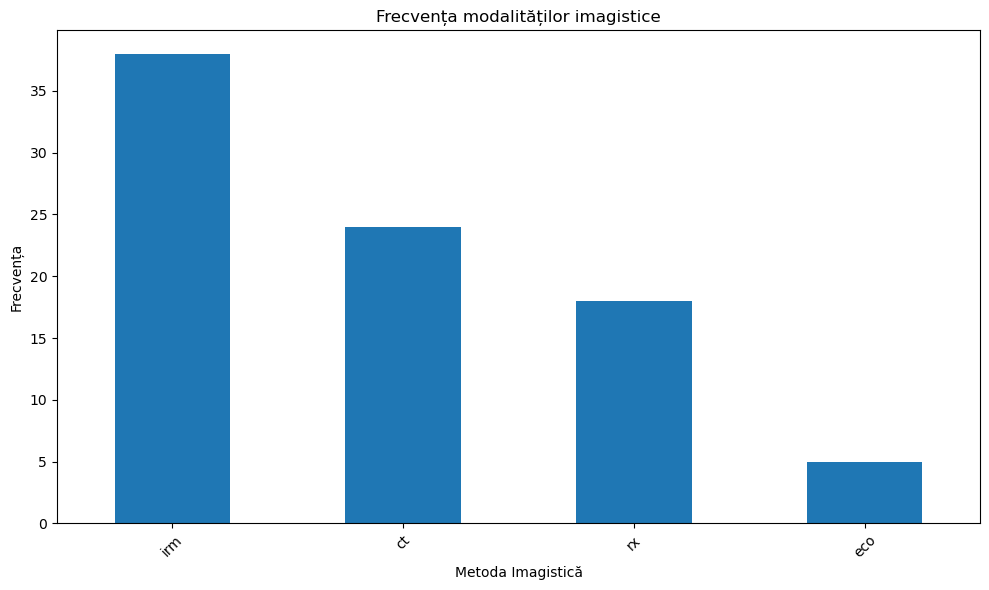

In [7]:
# Bar chart pentru distribuția modalităților imagistice
plt.figure(figsize=(10, 6))
imaging_modalities.plot(kind='bar')
plt.title('Frecvența modalităților imagistice')
plt.xlabel('Metoda Imagistică')
plt.ylabel('Frecvența')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('img-freq.png')
plt.show()

In [43]:
# Bar Chart pentru frecvența caracteristicilor imagistice
# Calculate and display the frequency of each characteristic
characteristic_frequencies = df[imaging_characteristics].sum().sort_values(ascending=False)

# Create a bar plot of characteristic frequencies
plt.figure(figsize=(12, 6))
characteristic_frequencies.plot(kind='bar')
plt.title('Frecvența Caracteristicilor Imagistice')
plt.xlabel('Caracteristica')
plt.ylabel('Frecvența')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('freq-cara.png')
plt.show()

In [45]:
# Bar chart pentru abordul terapeutic
# treatment_approach = df['tratament'].str.contains('chirurgical').map({True: 'Chirurgical', False: 'Conservativ'}).value_counts()
# plt.figure(figsize=(8, 6))
# treatment_approach.plot(kind='bar')
# plt.title('Abordul terapeutic')
# plt.xlabel('Intenția terapeutică')
# plt.ylabel('Numărul Pacienților')
# plt.savefig('treat-cons-sur.png')
# plt.show()

findfont: Font family '-apple-system' not found.
findfont: Font family 'BlinkMacSystemFont' not found.
findfont: Font family '"Segoe UI"' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family '-apple-system' not found.
findfont: Font family 'BlinkMacSystemFont' not found.
findfont: Font family '"Segoe UI"' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family '-apple-system' not found.
findfont: Font family 'BlinkMacSystemFont' not found.
findfont: Font family '"Segoe UI"' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family '-apple-system' not found.
findfont: Font family 'BlinkMacSystemFont' not found.
findfont: Font family '"Segoe UI"' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family '-apple-system' not found.
findfont: Font family 'BlinkMacSystemFont' not found.
findfont: Font family '"Segoe UI"' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family '-apple-system' not fou

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configure rcParams for an Apple-inspired minimalist style
mpl.rcParams.update({
    'font.family': 'Charter',      # Use the Charter font
    'font.size': 11,               # Set base font size to 11pt
    'figure.facecolor': 'white',   # White background for a clean look
    'axes.edgecolor': '#d3d3d3',     # Light gray axes borders
    'axes.linewidth': 0.8,         # Thin axes lines
    'axes.titlesize': 14,          # Slightly larger title
    'axes.labelsize': 11,          # Label size to match base font
    'xtick.color': '#555555',      # Darker ticks for readability
    'ytick.color': '#555555',
    'grid.color': '#e6e6e6',       # Very light grid lines
    'grid.linestyle': '-',         # Solid grid lines if you choose to display them
    'grid.linewidth': 0.6,
    'legend.frameon': False,       # No border around the legend
})

# Your data processing remains unchanged
treatment_approach = df['tratament'].str.contains('chirurgical').map({True: 'Chirurgical', False: 'Conservator'}).value_counts()

plt.figure(figsize=(8, 6))

# Using colors reminiscent of Apple design: a signature blue and a complementary hue.
treatment_approach.plot(kind='bar', color=['#007AFF', '#34C759'])

plt.title('Abordul terapeutic')
plt.xlabel('Intenția terapeutică')
plt.ylabel('Numărul Pacienților')

# Rotate labels for better readability
plt.xticks(rotation=0)  # Change to 45 if you want a slight tilt

# Remove the top and right spines for an extra clean, modern look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('treat-cons-sur.png', bbox_inches='tight')
plt.show()


# Analiza comorbidităților

In [27]:

# Funcție pentru a extrage comorbidități dintr-un șir de caractere
def extract_comorbidities(s):
    if pd.isna(s):
        return []
    return [c.strip() for c in s.split(',')]

# Extragerea și numărarea comorbidităților
all_comorbidities = []
for app in df['app']:
    all_comorbidities.extend(extract_comorbidities(app))

# Numărarea frecvenței comorbidităților
comorbidity_counts = Counter(all_comorbidities)

# Sortarea comorbidităților după frecvență și selectarea primelor 10
top_10_comorbidities = dict(sorted(comorbidity_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Crearea graficului
plt.figure(figsize=(12, 6))
plt.bar(top_10_comorbidities.keys(), top_10_comorbidities.values())
plt.title('Top 10 Comorbidități la Pacienții cu Spondilodiscită')
plt.xlabel('Comorbiditate')
plt.ylabel('Frecvență')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top-comorbiditati.png')
# Afișarea graficului
plt.show()

# Afișarea rezultatelor numerice
# print("Top 10 Comorbidități:")
# for comorbidity, count in top_10_comorbidities.items():
#     print(f"{comorbidity}: {count}")

# Distribuția Tratamentelor pentru Toate Caracteristicile Imagistice

In [41]:
# Initialize results DataFrame with proper columns
results = pd.DataFrame(columns=['Characteristic', 'Conservativ %', 'Chirurgical %', 'p-value'])

# Analyze all characteristics
for char in imaging_characteristics:
    # Create contingency table
    contingency_table = pd.crosstab(df[char], df['treatment_type'])
    
    # Perform statistical test
    if (contingency_table.values < 5).any():
        _, p_value = fisher_exact(contingency_table)
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calculate percentages
    if 1 in contingency_table.index:
        conservative_pct = (contingency_table.loc[1, 0] / contingency_table[0].sum()) * 100
        surgical_pct = (contingency_table.loc[1, 1] / contingency_table[1].sum()) * 100
    else:
        conservative_pct = 0
        surgical_pct = 0
    
    # Add row to results
    new_row = pd.DataFrame({
        'Characteristic': [char],
        'Conservativ %': [conservative_pct],
        'Chirurgical %': [surgical_pct],
        'p-value': [p_value]
    })
    results = pd.concat([results, new_row], ignore_index=True)

# Sortarea rezultatelor după diferența absolută între procentaje
results['Difference'] = abs(results['Conservativ %'] - results['Chirurgical %'])
results = results.sort_values('Difference', ascending=False)

# Crearea graficului combinat pentru toate caracteristicile
plt.figure(figsize=(15, 10))
x = np.arange(len(imaging_characteristics))
width = 0.35

conservativ = results['Conservativ %']
chirurgical = results['Chirurgical %']

plt.bar(x - width/2, conservativ, width, label='Conservativ', color='blue', alpha=0.5)
plt.bar(x + width/2, chirurgical, width, label='Chirurgical', color='red', alpha=0.5)

plt.xlabel('Caracteristici Imagistice')
plt.ylabel('Procentaj (%)')
plt.title('Distribuția Tratamentelor pentru Toate Caracteristicile Imagistice')
plt.xticks(x, results['Characteristic'], rotation=45, ha='right')
plt.legend()

# Adăugarea valorilor procentuale pe bare
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.1f}%"
        
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

add_value_labels(plt.gca())

plt.tight_layout()
plt.savefig('tratament-caracteristici.png')
plt.show()

# Afișarea tabelului cu rezultate, inclusiv diferența
results['Difference'] = results['Difference'].round(2)
print(results[['Characteristic', 'Conservativ %', 'Chirurgical %', 'Difference', 'p-value']].to_string(index=False))


/var/folders/l3/3tb_25kj547gmktfzvf0_sl00000gn/T/ipykernel_9651/3979503902.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


      Characteristic  Conservativ %  Chirurgical %  Difference  p-value
            colecții      44.444444      61.904762       17.46 0.362806
            fracturi      11.111111       0.000000       11.11 0.246011
                 hdl      11.111111      19.047619        7.94 0.682985
       gadolinofilie       7.407407      14.285714        6.88 0.641273
           iodofilie       3.703704       0.000000        3.70 1.000000
      anterolistezis       3.703704       0.000000        3.70 1.000000
       cardiomegalie       7.407407       4.761905        2.65 1.000000
 amprentare_medulară       7.407407       9.523810        2.12 1.000000
         hemangioame       7.407407       9.523810        2.12 1.000000
            eroziuni      74.074074      76.190476        2.12 1.000000
                edem      77.777778      76.190476        1.59 1.000000
           osteofite      11.111111       9.523810        1.59 1.000000
               abces      11.111111       9.523810        1.59 1

# Tabele de contingență Ficher

In [34]:
# Preprocessing
imaging_characteristics = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'osteofite', 'deshidratări_discale', 'gadolinofilie', 'iodofilie', 'hdl', 'hemangioame', 'abces', 'fracturi', 'anterolistezis', 'cardiomegalie']

# Create binary columns for each imaging characteristic
for char in imaging_characteristics:
    df[char] = df['caracteristici imagistice'].str.contains(char, case=False, na=False).astype(int)

# Create treatment type column
df['treatment_type'] = df['tratament'].str.contains('chirurgical').astype(int)

# Function to perform statistical test and create bar plot
def analyze_characteristic(characteristic):
    # Create contingency table
    contingency_table = pd.crosstab(df[characteristic], df['treatment_type'])
    
    # Perform chi-square or Fisher's exact test
    if (contingency_table.values < 5).any():
        _, p_value = fisher_exact(contingency_table)
        test_type = "Test Exact Fisher's"
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = "Testul Chi-Pătrat"
    
    # Calculate percentages for presence of characteristic (row 1)
    if 1 in contingency_table.index:
        conservative_pct = (contingency_table.loc[1, 0] / contingency_table[0].sum()) * 100
        surgical_pct = (contingency_table.loc[1, 1] / contingency_table[1].sum()) * 100
    else:
        conservative_pct = 0
        surgical_pct = 0
    
    return pd.DataFrame({
        'Characteristic': [characteristic],
        'Conservativ %': [conservative_pct],
        'Chirurgical %': [surgical_pct],
        'p-value': [p_value]
    })

# Analyze all characteristics and compile results
results = pd.concat([analyze_characteristic(char) for char in imaging_characteristics], ignore_index=True)
# Extrage coloanele relevante
df_analysis = df[['caracteristici imagistice', 'tratament']].copy()  # Create a copy

# Descompune caracteristicile imagistice (pot fi multiple separate de virgulă)
df_analysis['caracteristici imagistice'] = df_analysis['caracteristici imagistice'].str.split(', ')

# Explodează caracteristicile imagistice pentru a avea o singură caracteristică pe rând
df_analysis = df_analysis.explode('caracteristici imagistice')

# Filtrează caracteristicile care apar de mai mult de 5 ori
characteristic_counts = df_analysis['caracteristici imagistice'].value_counts()
common_characteristics = characteristic_counts[characteristic_counts > 5].index

# Filtrează datele pentru a include doar caracteristicile comune
df_common = df_analysis[df_analysis['caracteristici imagistice'].isin(common_characteristics)].copy()

# Aplică testul Fisher și afișează doar rezultatele cu p < 1
for characteristic in common_characteristics:
    # Folosește .loc pentru a adăuga coloane noi
    df_common.loc[:, 'Prezenta'] = df_common['caracteristici imagistice'] == characteristic
    df_common.loc[:, 'Chirurgical'] = df_common['tratament'].str.contains('chirurgical')

    contingency_table = pd.crosstab(df_common['Prezenta'], df_common['Chirurgical'])
    contingency_table.index = ['Absenta', 'Prezenta']
    contingency_table.columns = ['Non-chirurgical', 'Chirurgical']

    odds_ratio, p_value = fisher_exact(contingency_table)

    if p_value < 1:
        print(f"Caracteristica: {characteristic}")
        print(f"Tabel de contingență:\n{contingency_table}")
        print(f"Valoare p: {p_value:.4f}\n")

Caracteristica: eroziuni
Tabel de contingență:
          Non-chirurgical  Chirurgical
Absenta                46           43
Prezenta               21           16
Valoare p: 0.6961

Caracteristica: colecții
Tabel de contingență:
          Non-chirurgical  Chirurgical
Absenta                55           46
Prezenta               12           13
Valoare p: 0.6561

Caracteristica: hdl
Tabel de contingență:
          Non-chirurgical  Chirurgical
Absenta                64           55
Prezenta                3            4
Valoare p: 0.7049



# Tabele de contingență FICHER V2

In [3]:
# Assuming df is your DataFrame with 48 patients and binary characteristic columns ('eroziuni', 'colecții', 'hdl')
# And a binary treatment column (e.g., df['is_surgical'] = df['tratament'].str.contains('chirurgical'))

characteristics_to_analyze = ['eroziuni', 'colecții', 'hdl'] # The 3 characteristics chosen

# Ensure treatment_type is binary 0/1 for crosstab (0=Conservator, 1=Chirurgical)
df['treatment_type_binary'] = df['tratament'].str.contains('chirurgical', case=False, na=False).astype(int)

for char in characteristics_to_analyze:
    # Create contingency table for this characteristic based on unique patients (df)
    # Index: Presence (0/1), Columns: Treatment Type (0/1)
    contingency_table_correct = pd.crosstab(df[char], df['treatment_type_binary'])

    # Rename index and columns for clarity in output/table text
    contingency_table_correct.index = ['Absenta', 'Prezenta']
    contingency_table_correct.columns = ['Non-chirurgical', 'Chirurgical']

    print(f"Caracteristica: {char}")
    print(f"Tabel de contingență (corect):")
    print(contingency_table_correct)

    # Perform Fisher's exact test on the correct contingency table
    # fisher_exact returns oddsratio and pvalue
    odds_ratio, p_value_correct = fisher_exact(contingency_table_correct)

    print(f"Valoare p (corect): {p_value_correct:.4f}\n")

    # Optional: Calculate percentages out of total patients (N=48)
    total_patients = len(df)
    if 'Prezenta' in contingency_table_correct.index:
        total_with_char = contingency_table_correct.loc['Prezenta'].sum()
        pct_with_char = (total_with_char / total_patients) * 100
        print(f"Total pacienți cu {char}: {total_with_char} ({pct_with_char:.1f}%)")
        
        # Optional: Percentages within treatment groups (as in your Figure 19)
        if 'Non-chirurgical' in contingency_table_correct.columns and 'Chirurgical' in contingency_table_correct.columns:
             if contingency_table_correct['Non-chirurgical'].sum() > 0:
                 pct_conservative_with_char = (contingency_table_correct.loc['Prezenta', 'Non-chirurgical'] / contingency_table_correct['Non-chirurgical'].sum()) * 100
             else:
                 pct_conservative_with_char = 0
                 
             if contingency_table_correct['Chirurgical'].sum() > 0:
                 pct_surgical_with_char = (contingency_table_correct.loc['Prezenta', 'Chirurgical'] / contingency_table_correct['Chirurgical'].sum()) * 100
             else:
                 pct_surgical_with_char = 0
             print(f"% în grupul non-chirurgical cu {char}: {pct_conservative_with_char:.1f}%")
             print(f"% în grupul chirurgical cu {char}: {pct_surgical_with_char:.1f}%\n")

Caracteristica: eroziuni
Tabel de contingență (corect):
          Non-chirurgical  Chirurgical
Absenta                 7            5
Prezenta               20           16
Valoare p (corect): 1.0000

Total pacienți cu eroziuni: 36 (75.0%)
% în grupul non-chirurgical cu eroziuni: 74.1%
% în grupul chirurgical cu eroziuni: 76.2%

Caracteristica: colecții
Tabel de contingență (corect):
          Non-chirurgical  Chirurgical
Absenta                15            8
Prezenta               12           13
Valoare p (corect): 0.2592

Total pacienți cu colecții: 25 (52.1%)
% în grupul non-chirurgical cu colecții: 44.4%
% în grupul chirurgical cu colecții: 61.9%

Caracteristica: hdl
Tabel de contingență (corect):
          Non-chirurgical  Chirurgical
Absenta                24           17
Prezenta                3            4
Valoare p (corect): 0.6830

Total pacienți cu hdl: 7 (14.6%)
% în grupul non-chirurgical cu hdl: 11.1%
% în grupul chirurgical cu hdl: 19.0%

